# Natural Language Processing Assignment
In this assignment, we will be working with a database of medical transcriptions. We will be experimenting with different data representations of these transcriptions which are discussed in the lecture video. Don't worry—you won't have to write much code yourself. You will have to fill in some gaps in the code. Read the descriptions carefully so you understand what the code is doing so you can fill the gaps in properly.

You'll want to run each cell (see the run button above) in order of the code. If you do not run them in order, errors might appear. Also, if there is something you need to fill in and you didn't, an error might appear as well. Read the instructions and run every block of code as you go along. Fill in gaps before running the code if instructed.

With the introduction out of the way, let's start with the assignment

## The Task

The task we want to complete is that we want to extract keywords out of the transcripts. Then we'll create a wordcloud showing the most common and important words.

## Loading the data
Firstly, we must let Python (the programming language we are using) load packages that can process our data. 

In [40]:
import string
from collections import Counter
import pandas as pd
import nltk; nltk.download('stopwords'); from nltk.corpus import stopwords
from wordcloud import WordCloud

YOUR_CODE_HERE = None # Ignore this, this is so the file runs even if you do not fill in any code.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PujaS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Next we want to read the data. We get it from an online site called "Huggingface". If you want, you can view the information of the dataset [here](https://huggingface.co/datasets/tchebonenko/MedicalTranscriptions), although it is not necessary for the assignment. If you run the code block below, a table should appear, giving you a sense of what the data looks like. Note that some of the data will be cut off; Jupyter notebook is trying to show a sneak peek of the data, as the dataset is too big to show all of it.

In [41]:
df = pd.read_csv("hf://datasets/tchebonenko/MedicalTranscriptions/mtsamples.csv.zip")
df.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


We want to analyse the transcription. In order to do so, we must clean the data first. We will make a new column where punctuation is removed, and the entire transcription is made to be lower case. We store this in a new column called `transcription_clean`.

**Exercise 1.** Why do we want to clean up the data for this task? Do we always want to clean up the data in this manner for any NLP task? Why/why not?

**Bonus.** If you answered we should always clean up the data, give some examples of other tasks where cleaning up data is important. If you answered we should not always clean up the data, give an example of a task where it would be counterproductive to do so. 

In [42]:
# Enter your answer here
#
#
#
#

def clean_str(s):
    new_s = str(s).lower()
    new_s = new_s.translate(str.maketrans('', '', string.punctuation))
    return new_s

df['transcription_clean'] = df['transcription'].apply(lambda s: clean_str(s))
df.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords,transcription_clean
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller...",subjective this 23yearold white female presen...
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh...",past medical history he has difficulty climbin...
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart...",history of present illness i have seen abc to...
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple...",2d mmode 1 left atrial enlargement with left...
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo...",1 the left ventricular cavity size and wall t...


Furthermore, we want to turn the transcript into a list of words. We will store this in a new column called `tokens`. We do this as follows: 

In [43]:
df['tokens'] = df['transcription_clean'].apply(lambda s: s.split())
df.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords,transcription_clean,tokens
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller...",subjective this 23yearold white female presen...,"[subjective, this, 23yearold, white, female, p..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh...",past medical history he has difficulty climbin...,"[past, medical, history, he, has, difficulty, ..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart...",history of present illness i have seen abc to...,"[history, of, present, illness, i, have, seen,..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple...",2d mmode 1 left atrial enlargement with left...,"[2d, mmode, 1, left, atrial, enlargement, with..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo...",1 the left ventricular cavity size and wall t...,"[1, the, left, ventricular, cavity, size, and,..."


We want to count the frequency of any given word in the transcripts. We can do this by using the `Counter` function from the `collections` package, which will store the results in a dictionary. We will display the 10 most common words in the transcripts.

In [44]:
def count_words(token_column):
    word_freq = Counter()

    for i in range(len(df['tokens'])):
        word_freq.update(token_column.iloc[i])
    return word_freq

word_freq = count_words(df['tokens'])
word_freq.most_common(10)

[('the', 147630),
 ('and', 82610),
 ('was', 71765),
 ('of', 59003),
 ('to', 50146),
 ('a', 42143),
 ('with', 35712),
 ('in', 32619),
 ('is', 26377),
 ('patient', 21902)]

There's something off about the result. It does not seem to show the key-words we are after.
**Exercise 2.** Can you tell what's wrong about this result? What do you think is the reason for this?

In [45]:
# Enter your answer here
# 
# 
# 
# 

The set of common words in a language that do not necessarily convey meaning are called "stopwords". We want to remove these from the data. We can use the `stopwords` function from the `nltk.corpus` package to get a list of stopwords in English. We will then create a new column called `tokens_filtered` which will store the tokens without the stopwords.

In [46]:

stop_words = set(stopwords.words('english'))

df['tokens_filtered'] = df['tokens'].apply(lambda s: [word for word in s if word not in stop_words])
df.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords,transcription_clean,tokens,tokens_filtered
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller...",subjective this 23yearold white female presen...,"[subjective, this, 23yearold, white, female, p...","[subjective, 23yearold, white, female, present..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh...",past medical history he has difficulty climbin...,"[past, medical, history, he, has, difficulty, ...","[past, medical, history, difficulty, climbing,..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart...",history of present illness i have seen abc to...,"[history, of, present, illness, i, have, seen,...","[history, present, illness, seen, abc, today, ..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple...",2d mmode 1 left atrial enlargement with left...,"[2d, mmode, 1, left, atrial, enlargement, with...","[2d, mmode, 1, left, atrial, enlargement, left..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo...",1 the left ventricular cavity size and wall t...,"[1, the, left, ventricular, cavity, size, and,...","[1, left, ventricular, cavity, size, wall, thi..."


Now we will try to run the word frequency analysis again.
**Exercise 3.** Fill in the code to run the word frequency analysis again. This time, display the 20 most common ones.

In [47]:
word_freq = count_words(df['tokens_filtered'])
word_freq.most_common(20)

[('patient', 21902),
 ('right', 11101),
 ('left', 10749),
 ('history', 8083),
 ('placed', 6960),
 ('normal', 6717),
 ('well', 5856),
 ('pain', 5352),
 ('procedure', 5000),
 ('also', 4311),
 ('using', 4060),
 ('mg', 3909),
 ('time', 3882),
 ('noted', 3869),
 ('blood', 3813),
 ('without', 3730),
 ('incision', 3557),
 ('used', 3511),
 ('performed', 3501),
 ('removed', 3480)]

Congratulations! You have finished the word frequency analysis. Now we will move on to creating a wordcloud. 

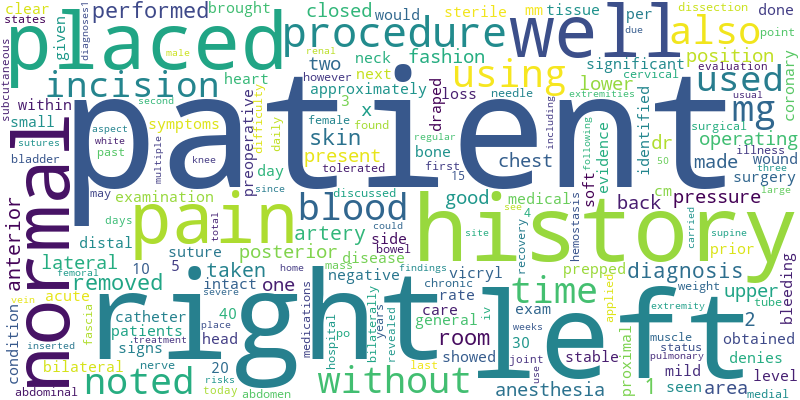

In [51]:
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(word_freq)
wordcloud.to_image()